# Data Analysis with Pandas

## I - Core components of DataFrames and Series 
## II - Creation & importation of a DataFrame
## III - Important Keywords with df
## IV - Basic Operations
## V - Data Cleaning
## VI - Advanced Manipulation 
## VII - Merging, Joining & Reshaping 
## VIII - Plotting & complementary packages 
## IX - Advantages and Drawbacks








.






.

## Introduction
Pandas is a powerful data analysis and manipulation library for Python. In this notebook, we'll explore various functionalities of pandas, from basic data structures like Series and DataFrames to more complex data manipulation techniques.

## Installation
Pandas can be installed using `pip` as follows:
```python
!pip install pandas
```
Alternatively, if you are using Anaconda, you can install using `conda`:
```python
conda install pandas
```
To import pandas, use the following command:
```python
import pandas as pd
```

## Core Components of Pandas
The primary two components of pandas are the `Series` and `DataFrame`.
A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series.

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Creating a Series
series = pd.Series([1, 3, 5, np.nan, 6, 8])

# Creating a DataFrame by passing a numpy array
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

# Creating a DataFrame by passing a dict of objects
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D' : np.array([3] * 4, dtype='int32'),
                     'E' : pd.Categorical(['test', 'train', 'test', 'train']),
                     'F' : 'gone' })
#df2.describe()

df.head()

,A,B,C,D
2023-01-01,0.607828,-0.048787,-1.681378,-0.220123
2023-01-02,-0.967545,-1.601654,0.154747,-1.020050
2023-01-03,-0.663582,1.664068,-1.553097,-0.680098
2023-01-04,0.720539,0.513021,1.356947,-1.802703
2023-01-05,1.419806,-0.243408,0.128545,-1.233986


In [5]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,gone
1,1.0,2013-01-02,1.0,3,train,gone
2,1.0,2013-01-02,1.0,3,test,gone
3,1.0,2013-01-02,1.0,3,train,gone


## Creating a DataFrame
There are multiple ways to create a DataFrame. Here, we'll create one using a dictionary of lists.

In [ ]:
data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, 11, 12],
        'D': [13, 14, 15, 16]}
df2 = pd.DataFrame(data)
print(df2)

   A  B   C   D
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16


**From a csv file**

In [6]:
dfn = pd.read_csv(r"D:\Documents\UVIC\Stats & Data Analysis\Pres\username.csv", sep=";")
dfn.head

<bound method NDFrame.head of     Username   Identifier First name Last name
0   booker12         9012     Rachel    Booker
1     grey07         2070      Laura      Grey
2  johnson81         4081      Craig   Johnson
3  jenkins46         9346       Mary   Jenkins
4    smith79         5079      Jamie     Smith>

## Series and DataFrame
Pandas has two main data structures: Series and DataFrame. Series represents a one-dimensional array, and DataFrame is a two-dimensional table of data with rows and columns.

Dataframes store data in the form of a grid (table) with rows and columns. Each column is used to store similar type of data (or variables/parameters) while each row is an instance of a value. Similar to a spreadsheet on Excel. 

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

#from a numpy array
data = np.array(["0","2","3"]),
print(pd.DataFrame(data))
s

   0  1  2
0  0  2  3


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# Pandas DataFrame Keywords Explanation

In this part, we will cover several essential keywords and methods used in the pandas library, which are crucial for data manipulation and analysis.

**Timestamp**
`Timestamp` represents a single point in time. It is the pandas equivalent to Python's `datetime` and is interchangeable with it in most cases.

```python
import pandas as pd
# Example of creating a Timestamp
timestamp = pd.Timestamp('2022-01-01 10:00')
print(timestamp)


In [ ]:
# Example of converting a series to categorical type
s = pd.Series(["a", "b", "c", "a"], dtype="category")
print(s)

In [ ]:
# Example of reading a CSV file
df = pd.read_csv('file_path.csv')

In [ ]:
#sort_values sorts a DataFrame by the values of one or more columns.
df.sort_values(by='column_name', ascending=True)

In [ ]:
#dropna removes missing values from a DataFrame.
df.dropna()


In [ ]:
#drop is used to remove rows or columns by specifying label names and the corresponding axis.
df.drop('column_name', axis=1)

In [ ]:
#fillna replaces missing values with a specified value.
df.fillna(value=0)

In [ ]:
#groupby allows grouping DataFrame rows based on the values of a specified column and applying a function to each group.
grouped = df.groupby('column_name')

In [ ]:
#groupby.agg() allows applying multiple aggregation operations to the grouped data.
df.groupby('column').agg({'data1': 'sum', 'data2': 'max'})

In [8]:
# Sample DataFrame
dfagg = pd.DataFrame({
    'group': ['A', 'A', 'B', 'B'],
    'data1': [10, 20, 10, 30],
    'data2': [100, 50, 40, 80]
})

# Perform the aggregation
result = dfagg.groupby('group').agg({'data1': 'sum', 'data2': 'max'})
print(dfagg)
print(result)

  group  data1  data2
0     A     10    100
1     A     20     50
2     B     10     40
3     B     30     80
       data1  data2
group              
A         30    100
B         40     80


In [11]:
#sum adds the values in a DataFrame or Series, typically used after grouping.
res = dfagg['data1'].sum()
print(res)

70


In [12]:
#groupby.sum() computes the sum of the grouped data.
print(dfagg.groupby('group').sum())

       data1  data2
group              
A         30    150
B         40    120


In [ ]:
#astype is used to cast a pandas object to a specified dtype.
df['column_name'].astype('int32')

In [ ]:
#cat is an accessor used to handle categorical data.
s['categorical_column'].cat.categories

In [ ]:
#set_categories is used to define the categories explicitly.
df['categorical_column'].cat.set_categories(['category1', 'category2'])

## Basic DataFrame Operations
Let's see how to view data, select, sort, and add new data to our DataFrame.

In [15]:
print(df2.head())
print(df2.tail(3))
print(df2.describe())
df2.sort_values(by='B')
df2['E'] = df2['A'] + df2['B']

   A  B   C   D
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16
   A  B   C   D
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16
              A         B          C          D
count  4.000000  4.000000   4.000000   4.000000
mean   2.500000  6.500000  10.500000  14.500000
std    1.290994  1.290994   1.290994   1.290994
min    1.000000  5.000000   9.000000  13.000000
25%    1.750000  5.750000   9.750000  13.750000
50%    2.500000  6.500000  10.500000  14.500000
75%    3.250000  7.250000  11.250000  15.250000
max    4.000000  8.000000  12.000000  16.000000


In [ ]:
# Viewing the top rows of the DataFrame
df.head()

# Viewing the index, columns, and the underlying numpy data
df.index
df.columns
df.to_numpy()

# Describe shows a quick statistic summary of your data
df.describe()

# Sorting by an axis and by values
df.sort_index(axis=1, ascending=False)
df.sort_values(by='B')

,A,B,C,D
2023-01-02,-0.806874,-0.689775,-0.280344,-0.236044
2023-01-01,-0.003607,-0.584760,2.025843,-0.550929
2023-01-05,0.576850,0.151869,0.913662,-0.485021
2023-01-06,-0.283520,0.271833,1.036482,-0.311588
2023-01-04,0.772526,0.494485,-0.529486,0.276304
2023-01-03,0.590829,2.549776,-0.493782,-0.848701


## Data Cleaning
Data cleaning is a crucial step in data analysis. We'll demonstrate how to handle missing data and drop duplicates.

In [24]:
df2.iloc[2, 2] = np.nan  # Introduce a NaN value
print(df2)
df2.dropna(how='any')  # Drop any row with NaN
df2.fillna(value=5)    # Fill NaN with a value
pd.isna(df2)

   A  B     C   D   E
0  1  5   9.0  13   6
1  2  6  10.0  14   8
2  3  7   NaN  15  10
3  4  8  12.0  16  12


,A,B,C,D,E
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False


## Grouping
Grouping involves one or more of the following steps: Splitting the data, applying a function, and combining the results.

In [25]:
df2.groupby('A').sum()

,B,C,D,E
A,,,,
1,5,9.0,13,6
2,6,10.0,14,8
3,7,0.0,15,10
4,8,12.0,16,12


### Group By: Split-Apply-Combine
Advanced grouping operations to summarize data.

In [ ]:
df3.groupby('F').agg({'A': ['mean', 'min', 'max'], 'B': 'sum', 'C': 'count'})

A                             B     C
           mean       min       max       sum count
F                                                  
False -0.819656 -1.830707 -0.277708  5.475151     8
True   0.954371  0.022371  2.637768 -4.011988     8

## Advanced DataFrame Manipulation
We will now look at more advanced data manipulations like indexing, selection, and extending the DataFrame with new data.

In [27]:
df3 = pd.DataFrame(np.random.randn(16, 5), columns=list('ABCDE'))
df3['F'] = df3['A'] > 0
# Selecting data with a boolean criterion
df_positive_A = df3[df3['A'] > 0]

### MultiIndex and Advanced Indexing
Pandas allows for more complex indexing with MultiIndex.

In [23]:
#2 vectors
arrays = [np.array(['earth', 'earth', 'fire', 'fire']),
         np.array(['one', 'two', 'one', 'two'])]

#creating the pairs
df_multi = pd.DataFrame(np.random.randn(4, 4), index=arrays, columns=['A', 'B', 'C', 'D'])

#naming the multiIndex Levels
df_multi.index.names = ['element', 'number']

print(df_multi)
print(df_multi.loc['earth'])

                       A         B         C         D
element number                                        
earth   one     1.802362 -0.881364 -1.003541 -0.751498
        two    -0.382917 -1.265484 -1.178762  0.289290
fire    one    -0.027029 -0.185177  0.001865  1.227532
        two     0.813335  0.471637  0.901304  0.802895
               A         B         C         D
number                                        
one     1.802362 -0.881364 -1.003541 -0.751498
two    -0.382917 -1.265484 -1.178762  0.289290


To access all values from the 'fire' index level in the 'B' column

In [24]:
fire_b_values = df_multi.loc['fire', 'B']

print(fire_b_values)

number
one   -0.185177
two    0.471637
Name: B, dtype: float64


### Pivot Tables
Creating pivot tables for data summarization. (means by default, for each combinaisons of rows / columns)

In [39]:
df_pivot = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['sky', 'sky', 'sky', 'sea', 'sea', 'sea'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
pd.pivot_table(df_pivot, values='D', index=['A', 'B'], columns=['C'])

C             sea       sky
A     B                    
one   A -0.327817  0.406799
      B  0.859431  0.598356
      C  1.663204  2.425405
three A -2.881333       NaN
      B       NaN -1.104567
      C -1.135694       NaN
two   A       NaN -0.278169
      B  0.374311       NaN
      C       NaN  0.486610

## Time Series
Pandas has simple, powerful, and efficient functions for performing operations like resampling during frequency conversion (e.g., converting secondly data into 5-minute data).

C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\4221664191.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.asfreq(freq='M', method='bfill')


<Axes: >

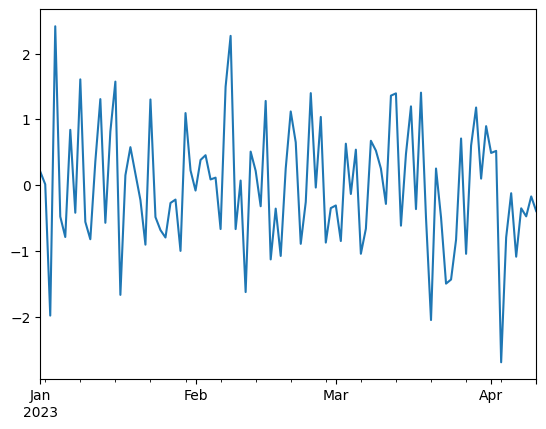

In [4]:
# Creating a time series with a DateTime index
rng = pd.date_range('20230101', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

# Changing the frequency of the time series
ts.asfreq(freq='M', method='bfill')

# Plotting the time series
ts.plot()

## Categorical Data
Pandas can include categorical data in a DataFrame, which can lead to more efficient storage and better performance for certain operations.

In [21]:
# Create the initial DataFrame
df_cat = pd.DataFrame({'id': range(1, 6),
                       'raw_grade': ['a', 'b', 'c', 'a', 'e']})

# Convert 'raw_grade' to a categorical type with the specified categories
categories = ['very bad', 'bad', 'medium', 'good', 'very good']
df_cat['grade'] = pd.Categorical(df_cat['raw_grade'], categories=categories, ordered=True)

# Compute group sizes
group_sizes = df_cat.groupby('grade').size()

# Reindex the group sizes to include all categories, filling missing values with 0
group_sizes = group_sizes.reindex(categories, fill_value=0)

# Print the group sizes
print(group_sizes)


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64


C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\2765931533.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_cat.groupby('grade').size()


In [23]:
# Create a larger DataFrame
df_cat = pd.DataFrame({
    'id': range(1, 101),  # Increase the range for a larger DataFrame
    'raw_grade': np.random.choice(['a', 'b', 'c', 'd', 'e', 'f'], size=100)  # Use numpy to randomly choose letters
})

# Map the randomly chosen letters to more descriptive categories
grade_mapping = {'a': 'very good', 'b': 'good', 'c': 'medium', 'd': 'bad', 'e': 'very bad', 'f': 'fail'}

# Convert 'raw_grade' to more descriptive categories and then to a categorical type
df_cat['grade'] = df_cat['raw_grade'].map(grade_mapping)
categories = ['very good', 'good', 'medium', 'bad', 'very bad', 'fail']
df_cat['grade'] = pd.Categorical(df_cat['grade'], categories=categories, ordered=True)

# Compute group sizes
group_sizes = df_cat.groupby('grade').size()

# Reindex the group sizes to include all categories, filling missing values with 0
group_sizes = group_sizes.reindex(categories, fill_value=0)

# Print the group sizes
print(group_sizes)


grade
very good    22
good         14
medium       18
bad          15
very bad     19
fail         12
dtype: int64


C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\4223968298.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_cat.groupby('grade').size()


In [19]:
df_cat = pd.DataFrame({'id': range(1, 6),
                       'raw_grade': ['a', 'b', 'c', 'a', 'e']})

df_cat['grade'] = df_cat['raw_grade'].astype('category')


# set new categories
df_cat['grade'] = df_cat['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])

df_cat.sort_values(by='grade')

# Proceed with the grouping and size calculation
df_cat.groupby('grade').size()


C:\Users\abdou\AppData\Local\Temp\ipykernel_28820\866965226.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby('grade').size()


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## Merging and Joining
Pandas provides various ways to combine DataFrames including merge and join operations similar to what is found in SQL.

In [40]:
# Merging two DataFrames
df_left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
df_right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                         'C': ['C0', 'C1', 'C2', 'C3'],
                         'D': ['D0', 'D1', 'D2', 'D3']})
print(df_left)
print(df_right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [41]:
# Inner Merge
# An inner merge returns only the rows that have matching keys in both DataFrames.
inner_merge_result = pd.merge(df_left, df_right, on='key')
print("Inner Merge Result:")
print(inner_merge_result)

Inner Merge Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [42]:
# Left Merge
# A left merge returns all the rows from the left DataFrame (`df_left`), and the matched rows from the right DataFrame (`df_right`).
# If there is no match, it fills the missing values with NaN.
left_merge_result = pd.merge(df_left, df_right, on='key', how='left')
print("\nLeft Merge Result:")
print(left_merge_result)


Left Merge Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [43]:
# Right Merge
# A right merge returns all the rows from the right DataFrame (`df_right`), and the matched rows from the left DataFrame (`df_left`).
# If there is no match, it fills the missing values with NaN.
right_merge_result = pd.merge(df_left, df_right, on='key', how='right')
print("\nRight Merge Result:")
print(right_merge_result)


Right Merge Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [44]:
# Outer Merge
# An outer merge returns all the rows from both DataFrames, with NaN for missing values where there is no match.
outer_merge_result = pd.merge(df_left, df_right, on='key', how='outer')
print("\nOuter Merge Result:")
print(outer_merge_result)


Outer Merge Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [45]:
# Left Join
# A left join returns all the rows from the left DataFrame (`df_left`), and the matched rows from the right DataFrame (`df_right`).
# It is similar to a left merge but operates on index labels.
left_join_result = df_left.join(df_right.set_index('key'), on='key', how='left')
print("\nLeft Join Result:")
print(left_join_result)


Left Join Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [46]:
# Right Join
# A right join returns all the rows from the right DataFrame (`df_right`), and the matched rows from the left DataFrame (`df_left`).
# It is similar to a right merge but operates on index labels.
right_join_result = df_right.join(df_left.set_index('key'), on='key', how='right')
print("\nRight Join Result:")
print(right_join_result)


Right Join Result:
  key   C   D   A   B
0  K0  C0  D0  A0  B0
1  K1  C1  D1  A1  B1
2  K2  C2  D2  A2  B2
3  K3  C3  D3  A3  B3


In [47]:
# Inner Join
# An inner join returns only the rows that have matching index labels in both DataFrames.
inner_join_result = df_left.join(df_right.set_index('key'), on='key', how='inner')
print("\nInner Join Result:")
print(inner_join_result)


Inner Join Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [48]:
# Outer Join
# An outer join returns all the rows from both DataFrames, with NaN for missing values where there is no match.
# It is similar to an outer merge but operates on index labels.
outer_join_result = df_left.join(df_right.set_index('key'), on='key', how='outer')
print("\nOuter Join Result:")
print(outer_join_result)


Outer Join Result:
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


## Reshaping
Stacking and pivoting DataFrames are common methods used to reshape data for analysis.

In [49]:
#Stacking and Unstacking:
#stack(): This method "stacks" the DataFrame columns into a single column, producing a Series.
#unstack(): This method does the opposite of stack; it "unstacks" the specified level of the index, producing a DataFrame.
df4 = pd.DataFrame(np.random.randn(8, 2), index=pd.date_range('1/1/2020', periods=8), columns=['A', 'B'])
df_stacked = df4.stack()
df_stacked.unstack()

,A,B
2020-01-01,-1.595605,-0.876573
2020-01-02,2.084272,0.385326
2020-01-03,0.684346,0.771169
2020-01-04,1.440774,1.238793
2020-01-05,0.188529,0.342120
2020-01-06,-0.694351,-0.057646
2020-01-07,0.340423,2.037805
2020-01-08,0.343825,-0.875576


In [50]:
#melt(): This method "melts" a DataFrame from wide format to long format, unpivoting the data.
df4 = pd.DataFrame(np.random.randn(8, 2), index=pd.date_range('1/1/2020', periods=8), columns=['A', 'B'])

# Melting the DataFrame
melted_df = pd.melt(df4.reset_index(), id_vars=['index'], value_vars=['A', 'B'])

# Renaming the columns
melted_df.columns = ['Date', 'Variable', 'Value']

# Display the melted DataFrame
print("Melted DataFrame:")
print(melted_df)

Melted DataFrame:
         Date Variable     Value
0  2020-01-01        A  1.543573
1  2020-01-02        A -0.905612
2  2020-01-03        A -0.542369
3  2020-01-04        A -0.145062
4  2020-01-05        A -0.070255
5  2020-01-06        A  1.272391
6  2020-01-07        A  0.246667
7  2020-01-08        A -0.656781
8  2020-01-01        B  0.836217
9  2020-01-02        B  0.358399
10 2020-01-03        B -0.800496
11 2020-01-04        B -1.065624
12 2020-01-05        B  0.334438
13 2020-01-06        B  0.981275
14 2020-01-07        B -0.594150
15 2020-01-08        B -0.995085


## Working with Text Data
Pandas provides a range of methods to work efficiently with text data.

In [51]:
import pandas as pd

# Sample DataFrame
data = {'text_column': ['apple123', 'banana456', 'orange789', 'grape101112', 'pineapple131415'],
        'numeric_column': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# 1. String Methods
# Pandas Series objects have a set of string processing methods under the .str accessor, allowing you to apply string operations element-wise.
# Convert strings to lowercase
lowercase_text = df['text_column'].str.lower()
# Check if strings contain a pattern
contains_pattern = df['text_column'].str.contains('app')
# Split strings into lists
split_strings = df['text_column'].str.split('')

# 2. String Concatenation
# You can concatenate strings in Pandas using the + operator or the .str.cat() method.
# Concatenate strings
concatenated_strings = df['text_column'] + df['numeric_column'].astype(str)

# 3. String Slicing
# Use slicing with .str accessor to extract substrings.
# Extract first 3 characters
sliced_text = df['text_column'].str[:3]

# 4. String Replacement
# Replace substrings in Pandas Series using the .str.replace() method.
# Replace 'apple' with 'grape'
replaced_text = df['text_column'].str.replace('apple', 'grape')

# 5. String Extraction
# Extract substrings using regular expressions with the .str.extract() method.
# Extract numbers from text
extracted_numbers = df['text_column'].str.extract(r'(\d+)')
# Fill missing values with None
extracted_numbers = extracted_numbers.fillna('')

# 6. String Padding
# Pad strings with leading or trailing characters using .str.pad().
# Pad strings with leading zeros
padded_strings = df['text_column'].str.pad(width=15, side='left', fillchar='0')


# Displaying Results
result_df = pd.DataFrame({
    'Original Text': df['text_column'].values,
    'Lowercase Text': lowercase_text.values,
    'Contains "app"': contains_pattern.values,
    'Split Text': split_strings.values,
    'Concatenated Text': concatenated_strings.values,
    'Sliced Text': sliced_text.values,
    'Replaced Text': replaced_text.values,
    'Extracted Numbers': extracted_numbers.values.flatten(),  # Convert to 1D array
    'Padded Text': padded_strings.values
})

result_df


,Original Text,Lowercase Text,"Contains ""app""",Split Text,Concatenated Text,Sliced Text,Replaced Text,Extracted Numbers,Padded Text
0,apple123,apple123,True,"[, a, p, p, l, e, 1, 2, 3, ]",apple1231,app,grape123,123,0000000apple123
1,banana456,banana456,False,"[, b, a, n, a, n, a, 4, 5, 6, ]",banana4562,ban,banana456,456,000000banana456
2,orange789,orange789,False,"[, o, r, a, n, g, e, 7, 8, 9, ]",orange7893,ora,orange789,789,000000orange789
3,grape101112,grape101112,False,"[, g, r, a, p, e, 1, 0, 1, 1, 1, 2, ]",grape1011124,gra,grape101112,101112,0000grape101112
4,pineapple131415,pineapple131415,True,"[, p, i, n, e, a, p, p, l, e, 1, 3, 1, 4, 1, 5, ]",pineapple1314155,pin,pinegrape131415,131415,pineapple131415


## Visualization with Pandas
Pandas comes bundled with basic plotting capabilities that use matplotlib under the hood.

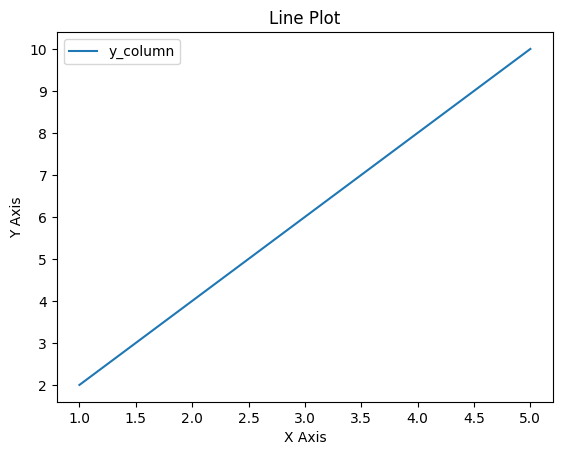

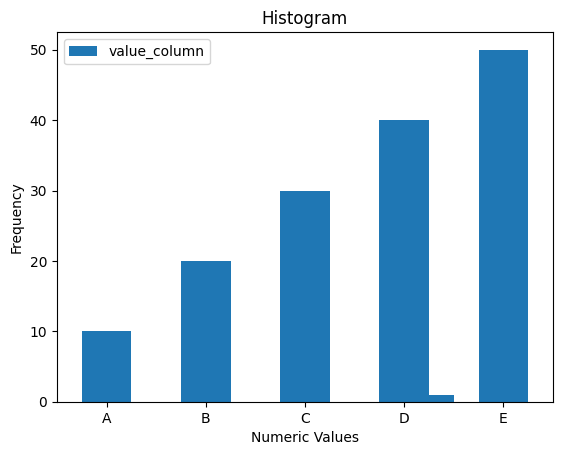

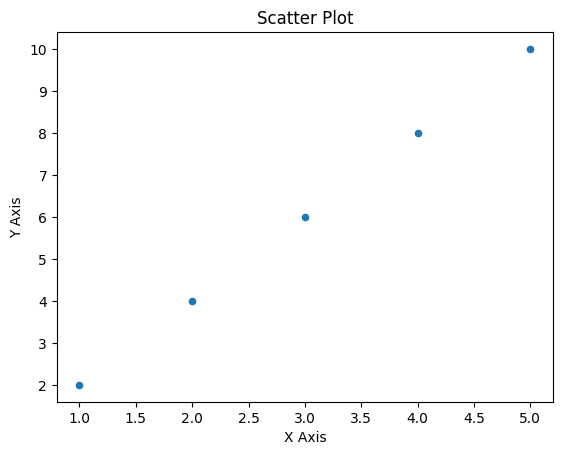

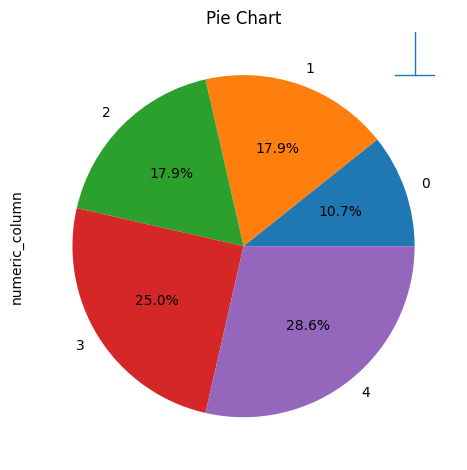

In [56]:
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'x_column': [1, 2, 3, 4, 5],
        'y_column': [2, 4, 6, 8, 10],
        'category_column': ['A', 'B', 'C', 'D', 'E'],
        'value_column': [10, 20, 30, 40, 50],
        'numeric_column': [3, 5, 5, 7, 8]}
df = pd.DataFrame(data)

# Line Plot


df.plot(x='x_column', y='y_column', kind='line')
plt.title('Line Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Bar Plot
plt.plot()
df.plot(x='category_column', y='value_column', kind='bar')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

# Histogram
plt.plot()
df['numeric_column'].plot(kind='hist')
plt.title('Histogram')
plt.xlabel('Numeric Values')

# Scatter Plot
plt.plot()
df.plot(x='x_column', y='y_column', kind='scatter')
plt.title('Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Box Plot
plt.plot()
df.plot(kind='box')
plt.title('Box Plot')

# Pie Chart
plt.plot()
df['numeric_column'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Plotting & complementary packages 
We'll use pandas' built-in plotting capabilities to visualize our data.

Plotting in Pandas is made easy with its integration with Matplotlib, a popular plotting library in Python. Additionally, Pandas provides its own built-in plotting functionality based on Matplotlib. Here's how you can plot data using Pandas and Matplotlib, along with some complementary packages for advanced visualization:

**Basic Plotting with Pandas:**

Pandas DataFrame and Series objects have a .plot() method, which is a wrapper around Matplotlib's pyplot.plot() function. You can use this method to create basic plots directly from your data.

`import pandas as pd`

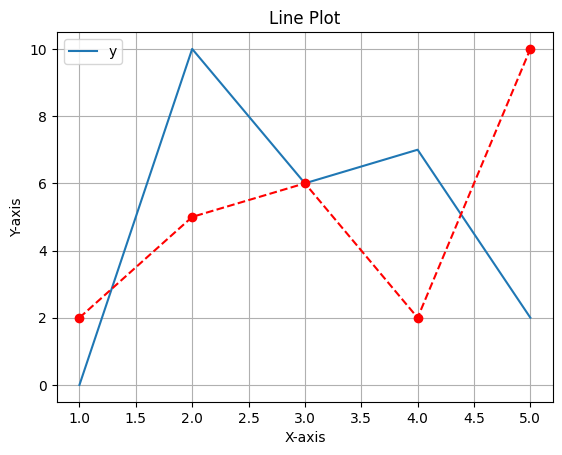

In [60]:

#Sample DataFrame
data = {'x': [1, 2, 3, 4, 5], 'y': [0, 10, 6, 7, 2]}
df = pd.DataFrame(data)

#Plotting
df.plot(x='x', y='y', kind='line', title='Line Plot')

#Sample DataFrame
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 6, 2, 10]}
df = pd.DataFrame(data)

#Plotting with Matplotlib
plt.plot(df['x'], df['y'], marker='o', linestyle='--', color='r')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

## Complementary Packages for Advanced Visualization:
**Seaborn: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.**

**Plotly: `Plotly` is an interactive plotting library that allows you to create interactive, web-based visualizations. It supports various chart types and offers features like hover tooltips, zooming, and panning.**

**Bokeh: `Bokeh` is another interactive visualization library that targets modern web browsers for presentation. It enables high-performance interactivity over large or streaming datasets.**

**Altair: `Altair` is a declarative statistical visualization library for Python. It is built on top of Vega and Vega-Lite, and it provides a simple and concise grammar for generating complex visualizations.**

## Advantages and Drawbacks

## Advantages

- Structured format
- Handling an heterogenous types of data
- Easy to manipulate
- Powerful analysis tools thanks to extensive libraries
- Versatile compatibility with other types of data (CSV, Json, Excel, ...)

## Drawbacks

- Manipulate maximum a medium size dataset
- Need to store all the data to apply any function
- The function are applied row by row
- Not inherently designed for scalability to very high dimensions